In [2]:
%reload_ext autoreload
%autoreload 1
import torch 
import sys
sys.path.append('..')
from torch import nn 
from torch.nn import functional as F
from torch import optim
from utils.loader import load,PairSetMNIST,Training_set,Test_set, Training_set_split,Validation_set
from torch.utils.data import Dataset, DataLoader
from models.Le_Net import LeNet_sharing_aux, train_Le_Net_Aux
from models.Inception_Net import Inception_block, conv_block, Google_Net, Auxiliary_loss, train_inception
from utils.evaluate_aux import compute_metrics, validate_model, evaluate_model, grid_search
import torch.cuda as cuda 
from utils.plot import boxplot

In [3]:

# parameters to optimize
drop_prob_aux = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
drop_prob_comp = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

# number of seeds to perform
seeds = [19, 123, 1234] 

grid_search(LeNet_sharing_aux,train_Le_Net_Aux, drop_prob_aux, drop_prob_comp, seeds, mini_batch_size=100, optimizer = optim.SGD, criterion = nn.CrossEntropyLoss(), n_epochs=40, eta=1e-1,lambda_l2 = 0, alpha=0.5, beta=0.5,rotate = False,translate=False,swap_channel = False, GPU=False)

KeyboardInterrupt: 

### 2 - Fix hyperparameters and evaluate model

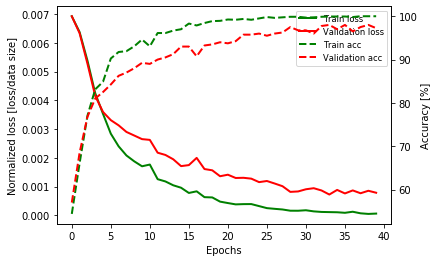


Trial 0 | Test Loss: 0.0016 | Test Accuracy: 95.60%



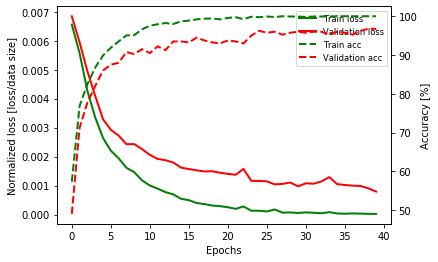


Trial 1 | Test Loss: 0.0022 | Test Accuracy: 93.10%



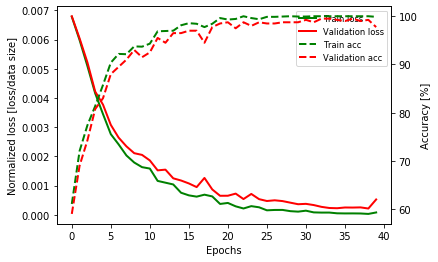


Trial 2 | Test Loss: 0.0024 | Test Accuracy: 92.80%



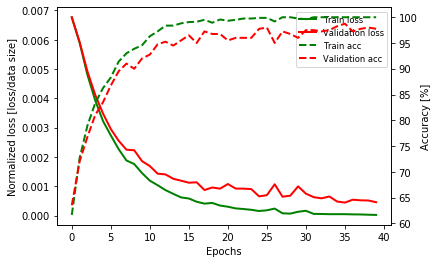


Trial 3 | Test Loss: 0.0019 | Test Accuracy: 95.20%



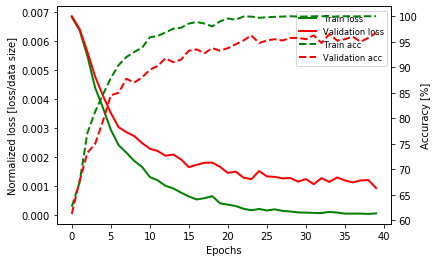


Trial 4 | Test Loss: 0.0019 | Test Accuracy: 94.10%



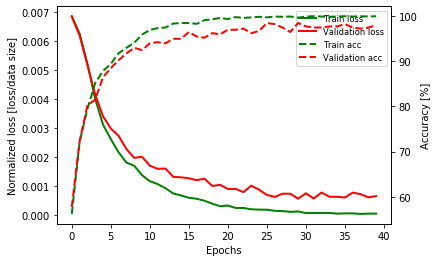


Trial 5 | Test Loss: 0.0015 | Test Accuracy: 95.50%



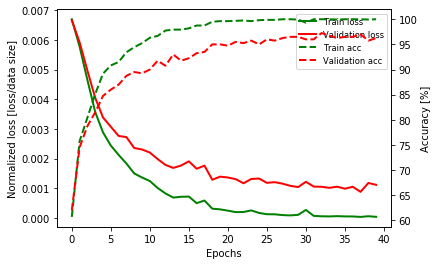


Trial 6 | Test Loss: 0.0022 | Test Accuracy: 93.80%



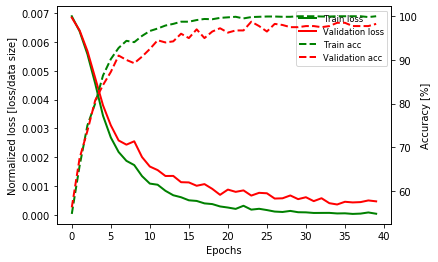


Trial 7 | Test Loss: 0.0015 | Test Accuracy: 94.30%



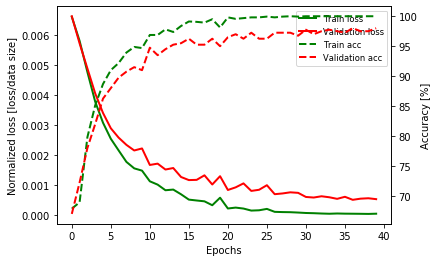


Trial 8 | Test Loss: 0.0019 | Test Accuracy: 94.60%



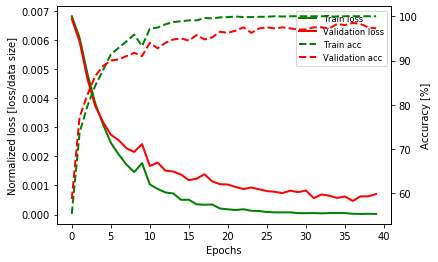


Trial 9 | Test Loss: 0.0021 | Test Accuracy: 93.40%



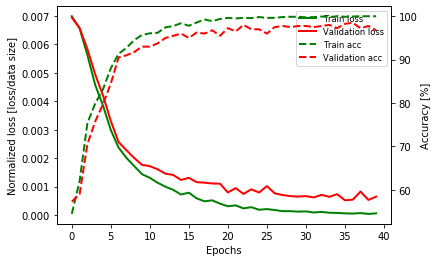


Trial 10 | Test Loss: 0.0016 | Test Accuracy: 94.70%



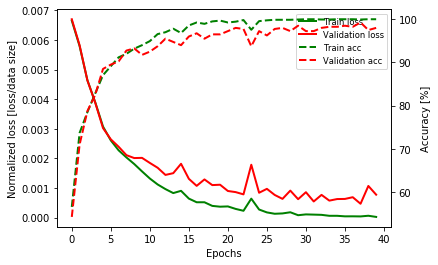


Trial 11 | Test Loss: 0.0016 | Test Accuracy: 95.10%



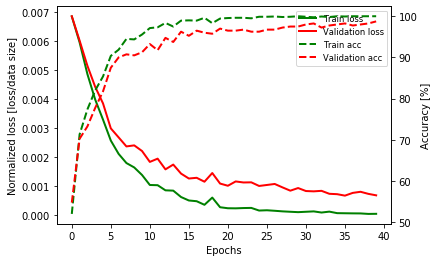


Trial 12 | Test Loss: 0.0012 | Test Accuracy: 96.10%



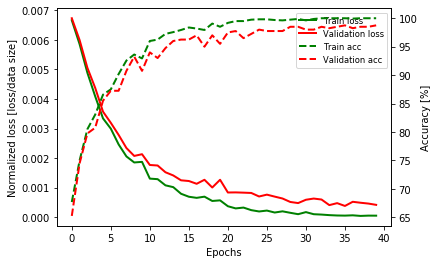


Trial 13 | Test Loss: 0.0020 | Test Accuracy: 93.90%



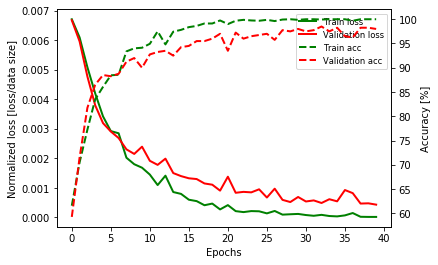


Trial 14 | Test Loss: 0.0015 | Test Accuracy: 95.00%



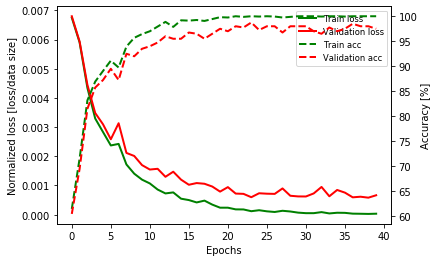


Trial 15 | Test Loss: 0.0017 | Test Accuracy: 94.80%



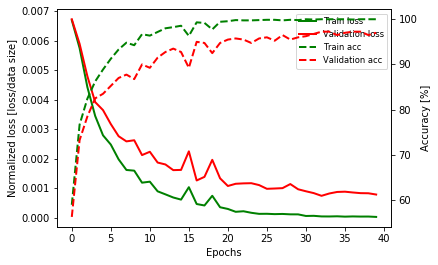


Trial 16 | Test Loss: 0.0016 | Test Accuracy: 95.00%



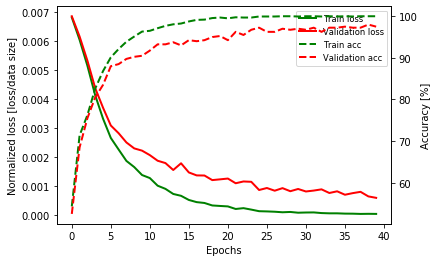


Trial 17 | Test Loss: 0.0020 | Test Accuracy: 93.70%



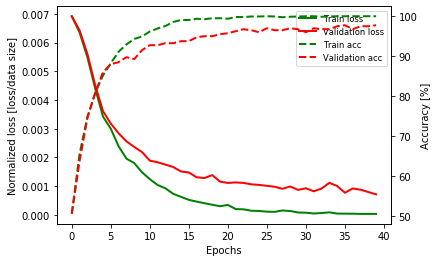


Trial 18 | Test Loss: 0.0017 | Test Accuracy: 94.80%



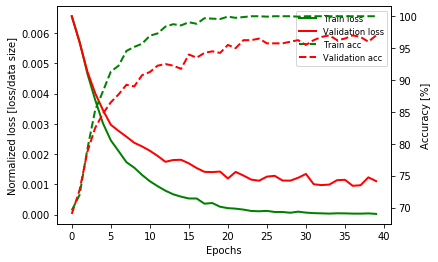


Trial 19 | Test Loss: 0.0016 | Test Accuracy: 95.70%



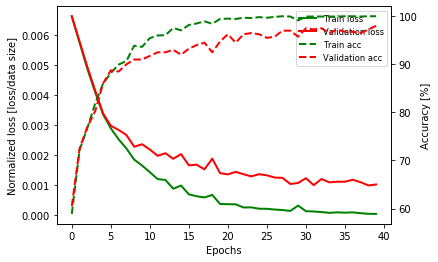


Trial 20 | Test Loss: 0.0018 | Test Accuracy: 93.90%



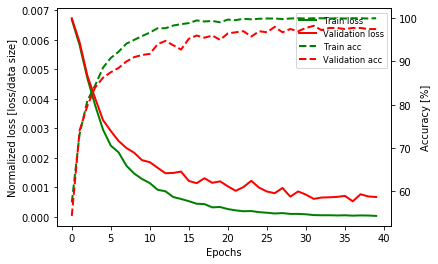


Trial 21 | Test Loss: 0.0020 | Test Accuracy: 93.70%



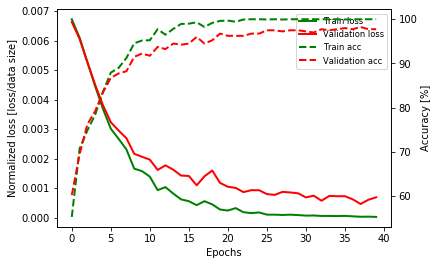


Trial 22 | Test Loss: 0.0021 | Test Accuracy: 94.30%



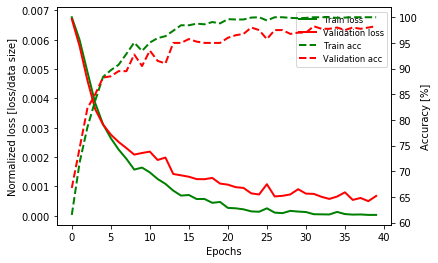


Trial 23 | Test Loss: 0.0017 | Test Accuracy: 94.60%



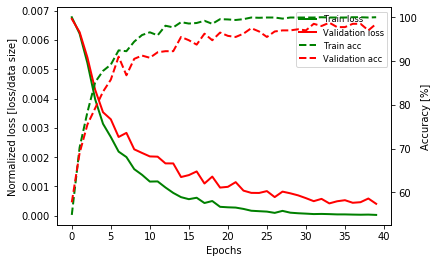


Trial 24 | Test Loss: 0.0014 | Test Accuracy: 95.40%



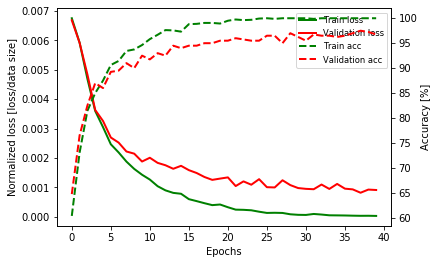


Trial 25 | Test Loss: 0.0022 | Test Accuracy: 93.10%



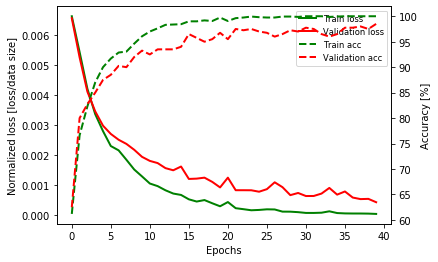


Trial 26 | Test Loss: 0.0025 | Test Accuracy: 93.20%



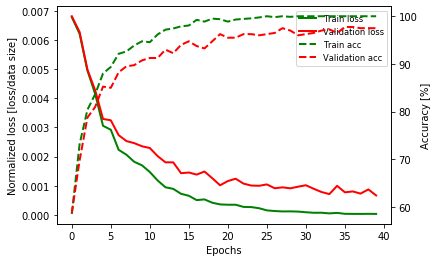


Trial 27 | Test Loss: 0.0016 | Test Accuracy: 95.60%



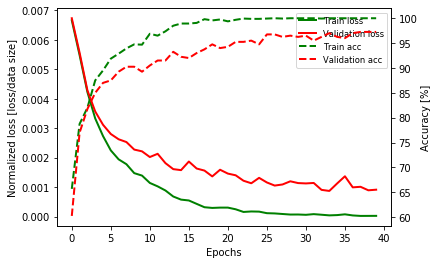


Trial 28 | Test Loss: 0.0018 | Test Accuracy: 93.60%



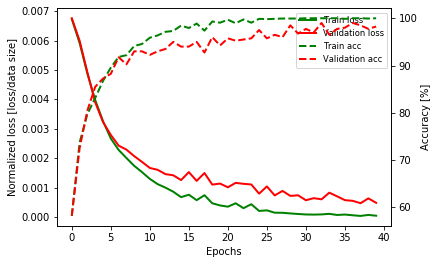


Trial 29 | Test Loss: 0.0020 | Test Accuracy: 93.90%



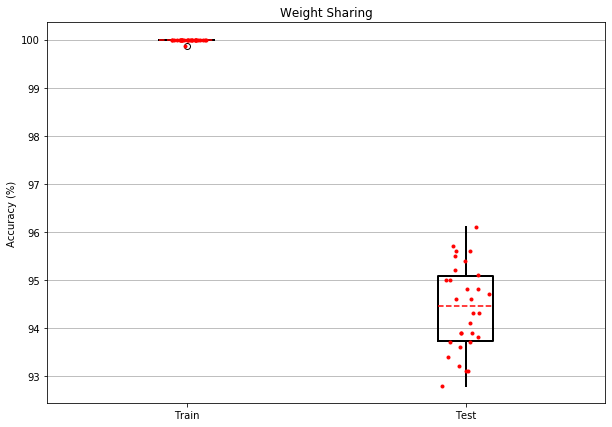

In [2]:
seeds = [3, 4, 452, 2345, 1234, 2134, 12345, 12377, 56765, 567776, 234, 1234, 1324543, 1234 , 345, 213456, 21345, 85689, 875698, 768897, 9786876, 989687, 764653, 53365, 87698, 9876, 323, 2, 6745, 46365365] # random seeds

train_results, test_losses, test_accuracies = evaluate_model(LeNet_sharing_aux,train_Le_Net_Aux, seeds, rotate=False, translate=False, swap_channel=True, GPU=True) 

data = torch.stack([train_results[:,1,39], test_accuracies])  # group data for boxplot
boxplot(data)